In [1]:
import cv2
import os 
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

DIR = 'C:/Users/Leo/Desktop/Machine learning/DL_Practice/digit_recognizer'

In [2]:
img_size = 28
num_classes = 10
LR = 1e-3

MODEL_NAME = 'digits-{}-{}.model'.format(LR,'2conv-basic')

In [3]:
from tensorflow.python import keras
def train_data():
    file = os.path.join(DIR, 'train.csv')
    data = np.loadtxt(file, skiprows=1, delimiter=',')
    
    x = data[:,1:]
    out_x = x.reshape(len(data),img_size,img_size,1)
    out_x = out_x/np.amax(out_x)
    
    y = data[:,0]
    out_y = keras.utils.to_categorical(np.array(y),num_classes)
    
    return out_x, out_y

X_train, y_train = train_data()

In [4]:
print(X_train.shape, y_train.shape)

(42000, 28, 28, 1) (42000, 10)


print(X_train)

In [5]:
import tensorflow as tf
tf.reset_default_graph()
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [6]:
tflearn.config.init_graph (num_cores=8)

convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, num_classes, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train_X = X_train[:40000]
train_y = y_train[:40000]

test_X = X_train[40000:]
test_y = y_train[40000:]

model.fit({'input': train_X}, {'targets': train_y}, n_epoch=1, validation_set=({'input': test_X}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 4374  | total loss: 0.02503 | time: 25.916s
| Adam | epoch: 001 | loss: 0.02503 - acc: 0.9904 -- iter: 39936/40000
Training Step: 4375  | total loss: 0.02277 | time: 26.969s
| Adam | epoch: 001 | loss: 0.02277 - acc: 0.9913 | val_loss: 0.07365 - val_acc: 0.9800 -- iter: 40000/40000
--


In [8]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\Leo\Desktop\Machine learning\DL_Practice\digit_recognizer\digits-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


In [9]:
def test_data():
    file = os.path.join(DIR, 'test.csv')
    data = np.loadtxt(file, skiprows=1, delimiter=',')
    x = data[:,:]
    out_x = x.reshape(len(data),img_size,img_size,1)
    out_x = out_x/np.amax(out_x)
    
    return out_x

X_test = test_data()

In [10]:
print(X_test.shape)

(28000, 28, 28, 1)


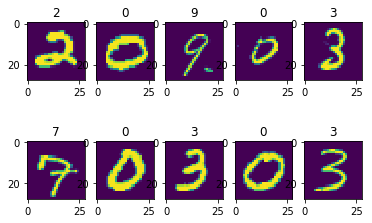

In [11]:
fig = plt.figure()
for i in range(10):
    p = fig.add_subplot(2,5, i+1)
    predictions = model.predict([X_test[i]])
    p.imshow(X_test[i].reshape(img_size,img_size))
    plt.title(np.argmax(predictions[0]))

Text(0.5,1,'3')

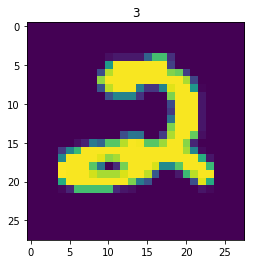

In [12]:
plt.imshow(X_test[0].reshape(img_size,img_size))
plt.title(np.argmax(predictions[0]))